#**PART 4. 합성곱 신경망**

##**01. 합성곱 신경망**
 : 합성곱 신경망은 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용.

 대표적으로 이미지 분류, 객체 탐지, 스타일 전이 등을 예를 듦.
 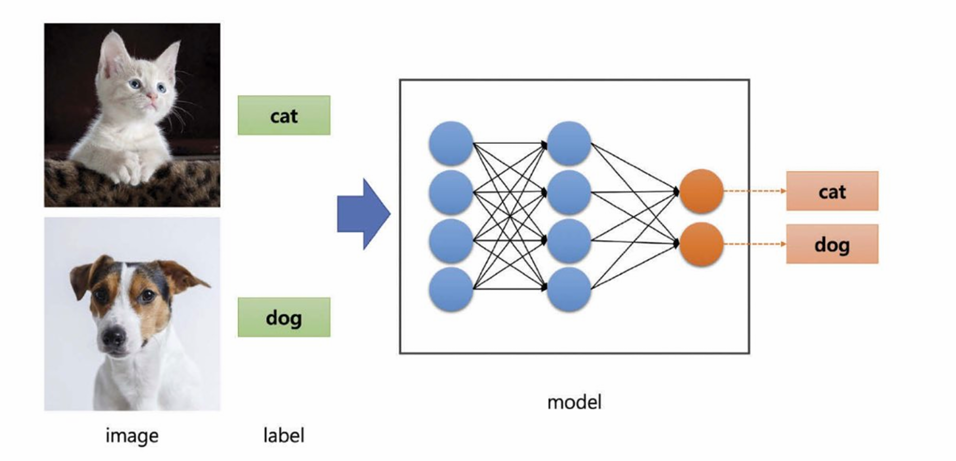

 - 객체 탐지 사례를 보여줌.

 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술.
 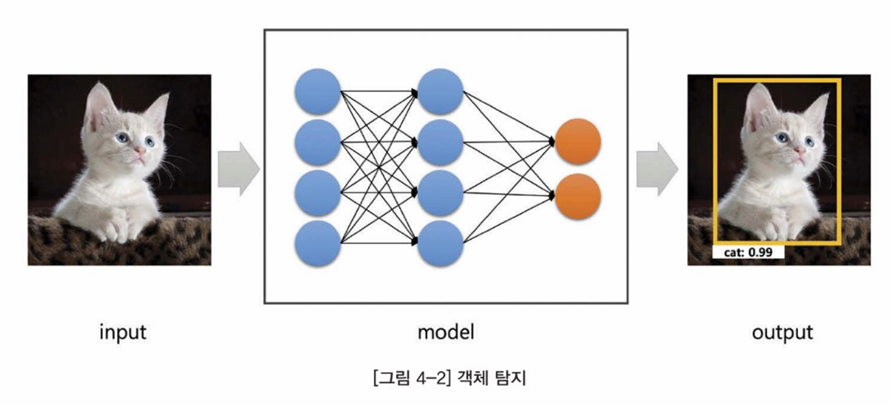

###1-1 이미지 표현
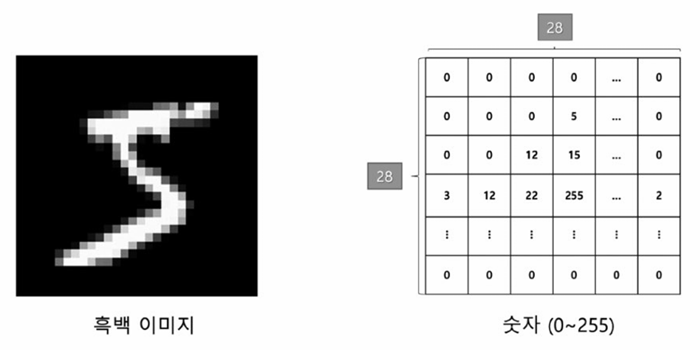

이미지를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현.

컬러 이미지는 R(빨강), G(초록),B(파랑) 채널로 구성된 3장의 이미지를 겹쳐서 표현.
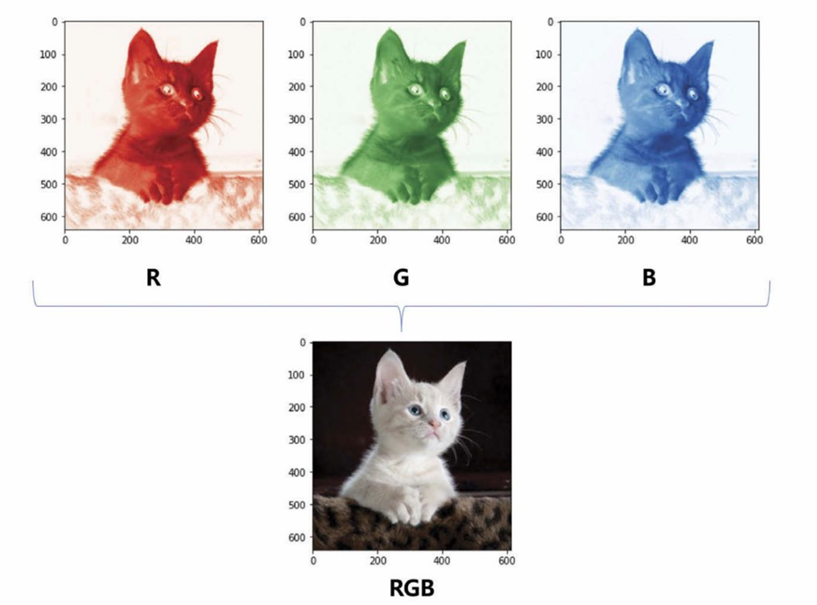

###1-2 합성곱
합성곱 연산은 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법을 만한다.

합성곱 연산을 통해서 추출된 이미지를 특성맵이라고 부름.
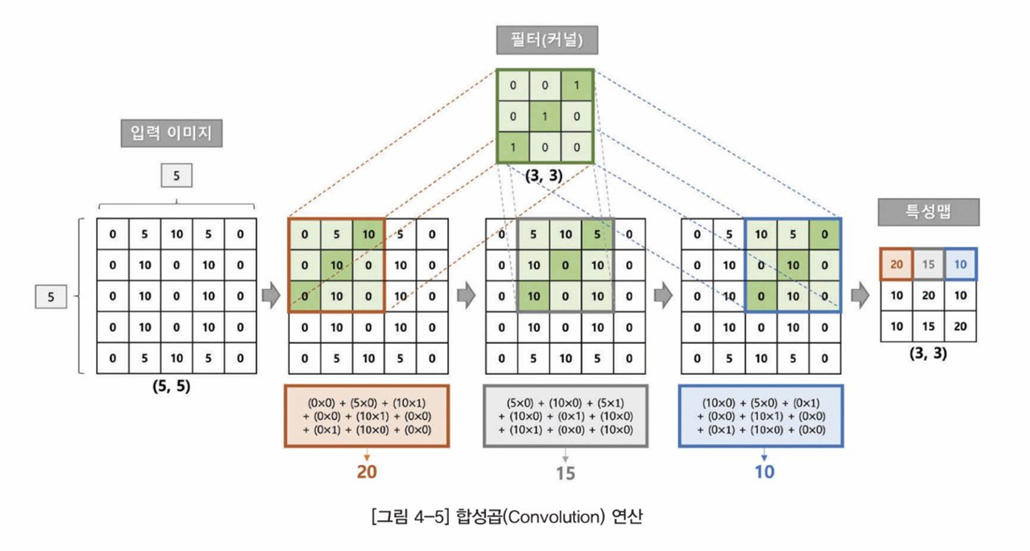

###1-3 채널
채널은 입력 이미지를 구성하는 2차원 배열의 개수.

컬러 이미지와 같이 입력 이미지가 여러 개의 채널을 갖는 경우, 합성곱 연산을 수행할 때 특성맵의 생성 과정을 잘 살펴봐야 함.
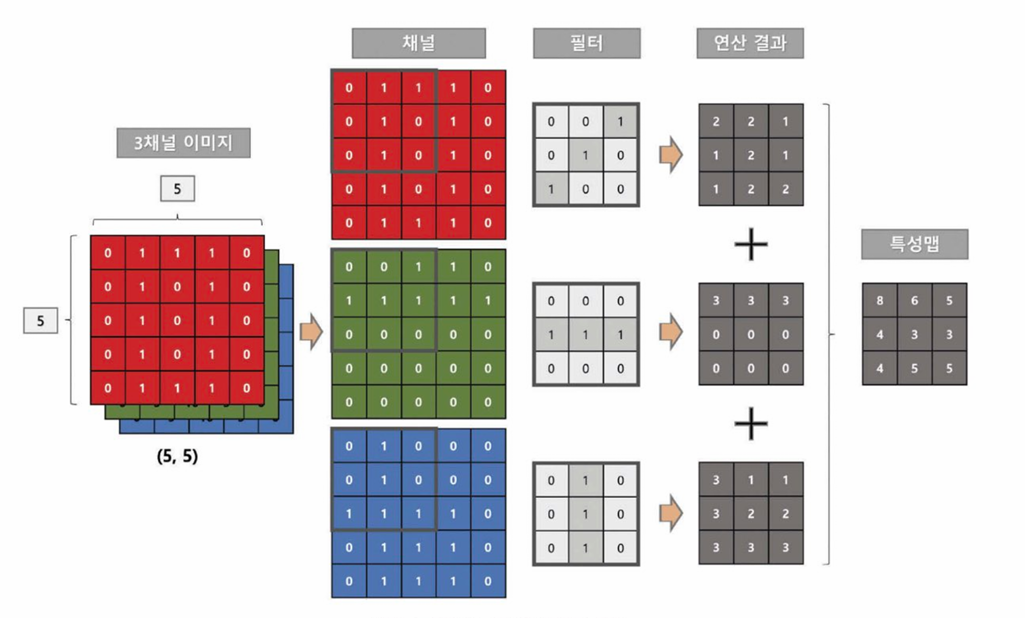

###1-4 스트라이드

커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나간다.

이때 이동하는 간격을 스트라이드로 정의하며, 주로 1또는 2로 설정.
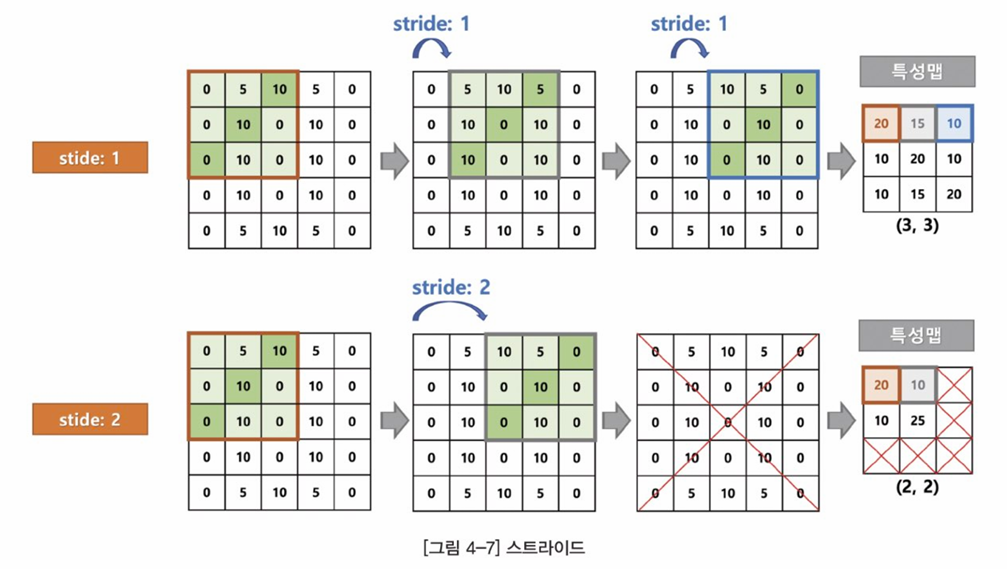

###1-5 패딩
추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩으 설정할 수 있다.
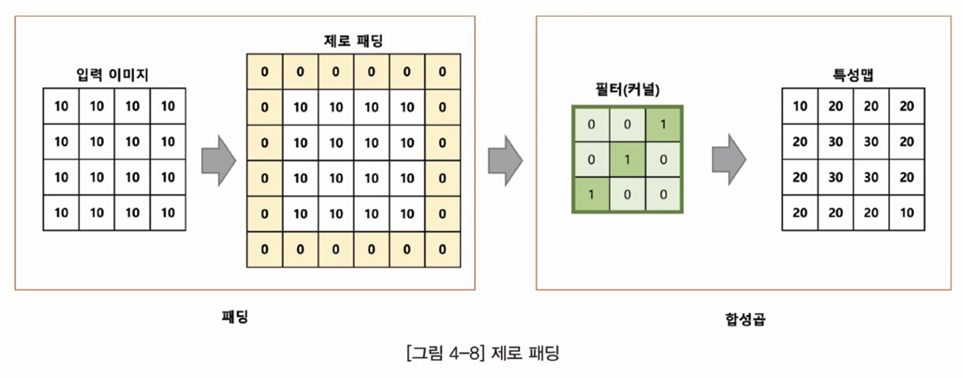

###1-6 특성맵 사이즈
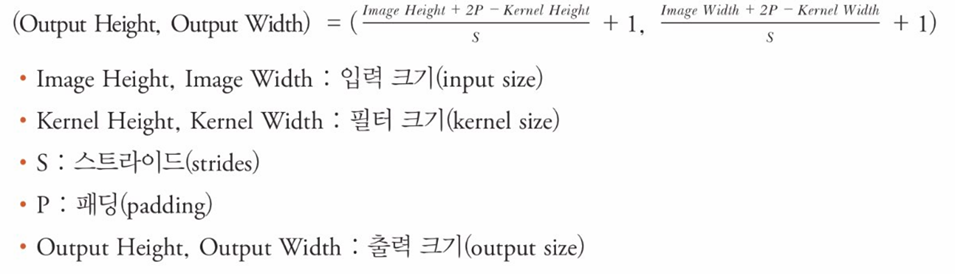

###1-7 풀링
 : 풀링 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어.
풀링 레이어는 크게 최대 풀링과 평균 풀링으로 나뉨.

##**02. 간단한 모델 생성**
###2-1. 데이터 로드 및 전처리

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


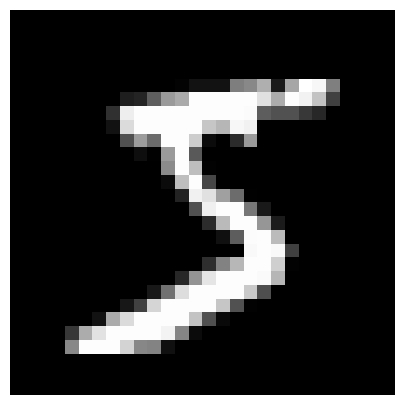

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize = (5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train.shape, x_valid.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)


###2-2. Sequential API로 모델 생성 및 학습
Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 만듦.
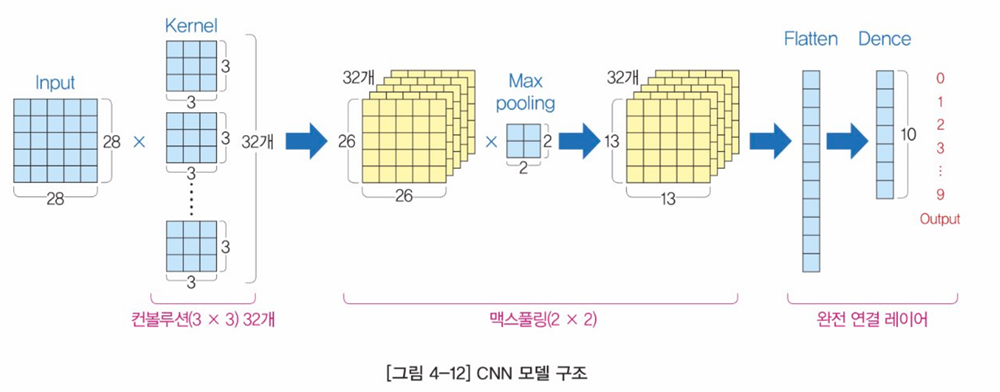

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', # (3,3) 크기의 서로 다른 32가지 종류 커널
                           input_shape=(28, 28, 1), name='conv'),
    # max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # classifier 출력층
    tf.keras.layers.Flatten(),    # 1차원 배열로 펼쳐준다
    tf.keras.layers.Dense(10, activation = 'softmax')   # 다중 분류 문제
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8860 - loss: 0.4090 - val_accuracy: 0.9719 - val_loss: 0.0932
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.9756 - loss: 0.0844 - val_accuracy: 0.9788 - val_loss: 0.0654
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9814 - loss: 0.0594 - val_accuracy: 0.9806 - val_loss: 0.0612
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9857 - loss: 0.0487 - val_accuracy: 0.9806 - val_loss: 0.0616
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9880 - loss: 0.0405 - val_accuracy: 0.9822 - val_loss: 0.0567
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9894 - loss: 0.0356 - val_accuracy: 0.9815 - val_loss: 0.0558
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9910 - loss: 0.0308 - val_accuracy: 0.9833 - val_loss: 0.0547
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9930 -

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9781 - loss: 0.0777


[0.0605866014957428, 0.9819999933242798]

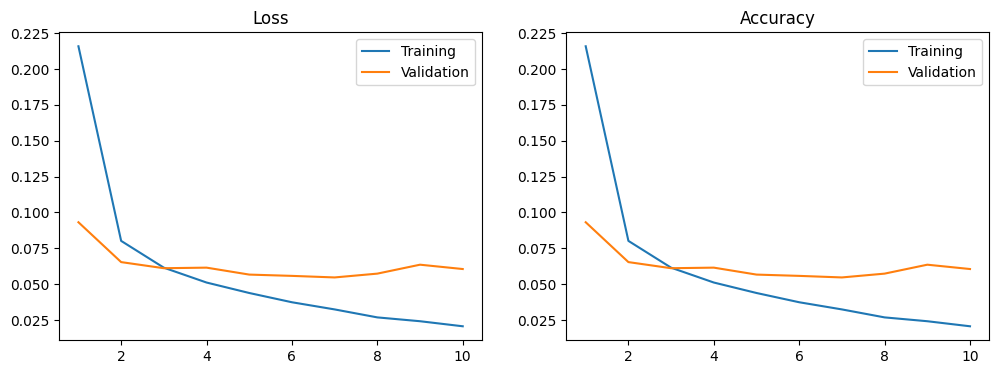

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label = 'Training')
  axes[0].plot(range(1, epoch+1), val_loss, label = 'Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label = 'Training')
  axes[1].plot(range(1, epoch+1), val_loss, label = 'Validation')
  axes[1].legend(loc = 'best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

###2-3. 모델 구조 파악
모델 인스턴스에 summary() 메소드를 적용해 주면, 모델의 구조를 요약해서 보여준다. 각 레이어의 이름과 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터 개수를 알 수 있다.
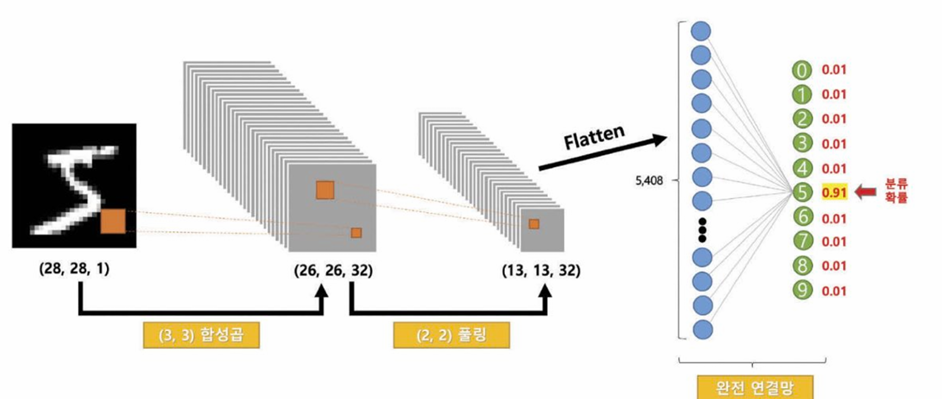

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv (Conv2D)                        │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool (MaxPooling2D)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

In [14]:
model.input

ValueError: The layer sequential has never been called and thus has no defined input.

In [13]:
model.output

ValueError: The layer sequential has never been called and thus has no defined output.

In [15]:
model.layers

[<Conv2D name=conv, built=True>,
 <MaxPooling2D name=pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>]

In [16]:
model.layers[0]

<Conv2D name=conv, built=True>

In [17]:
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor>

In [18]:
model.layers[0].output

<KerasTensor shape=(None, 26, 26, 32), dtype=float32, sparse=False, name=keras_tensor_1>

In [19]:
model.layers[0].weights

[<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=sequential/conv/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential/conv/bias>]

In [20]:
model.layers[0].kernel

<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=sequential/conv/kernel>

In [21]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<KerasVariable shape=(32,), dtype=float32, path=sequential/conv/bias>

In [22]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

<Conv2D name=conv, built=True>

In [24]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs = model.input,
                           outputs = [layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)


ValueError: The layer sequential has never been called and thus has no defined input.

In [25]:
# 첫 번재 레이어 conv의 출력층
conv_activation = activations[0]
conv_activation.shape

NameError: name 'activations' is not defined

NameError: name 'conv_activation' is not defined

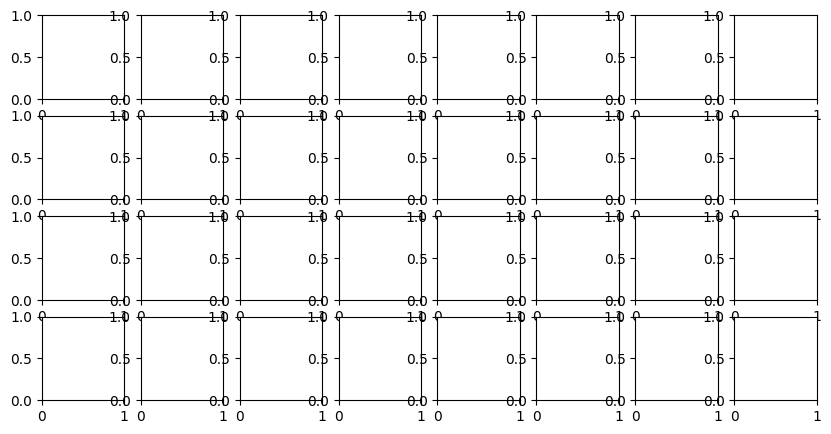

In [26]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두번째 레이어 pool 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

##**03. 복잡한 모델 생성**
###3-1 데이터셋 준비


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

In [ ]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd = []
for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

In [ ]:

# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

In [ ]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

###3-2. Functional API로 다중 입력, 다중 출력 레이어 생성
 - 입력 레이어 inputs의 경우, Conv2D 레이어와 Flatten 레이어의 입력으로 사용(2개의 출력) -> 각각 다른 레이어의 입력으로 사용. -> 최종적으로 Concatenate 레이어에서 합쳐져 Dense 레이어 통과

In [27]:
# Functional API 를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(concat)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 26, 26, 32)     │            320 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 13, 13, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 5408)           │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 784)            │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 6192)           │              0 │ flatten_1[0][0],       │
│                           │                        │                │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 10)             │         61,930 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 62,250 (243.16 KB)

 Trainable params: 62,250 (243.16 KB)

 Non-trainable params: 0 (0.00 B)

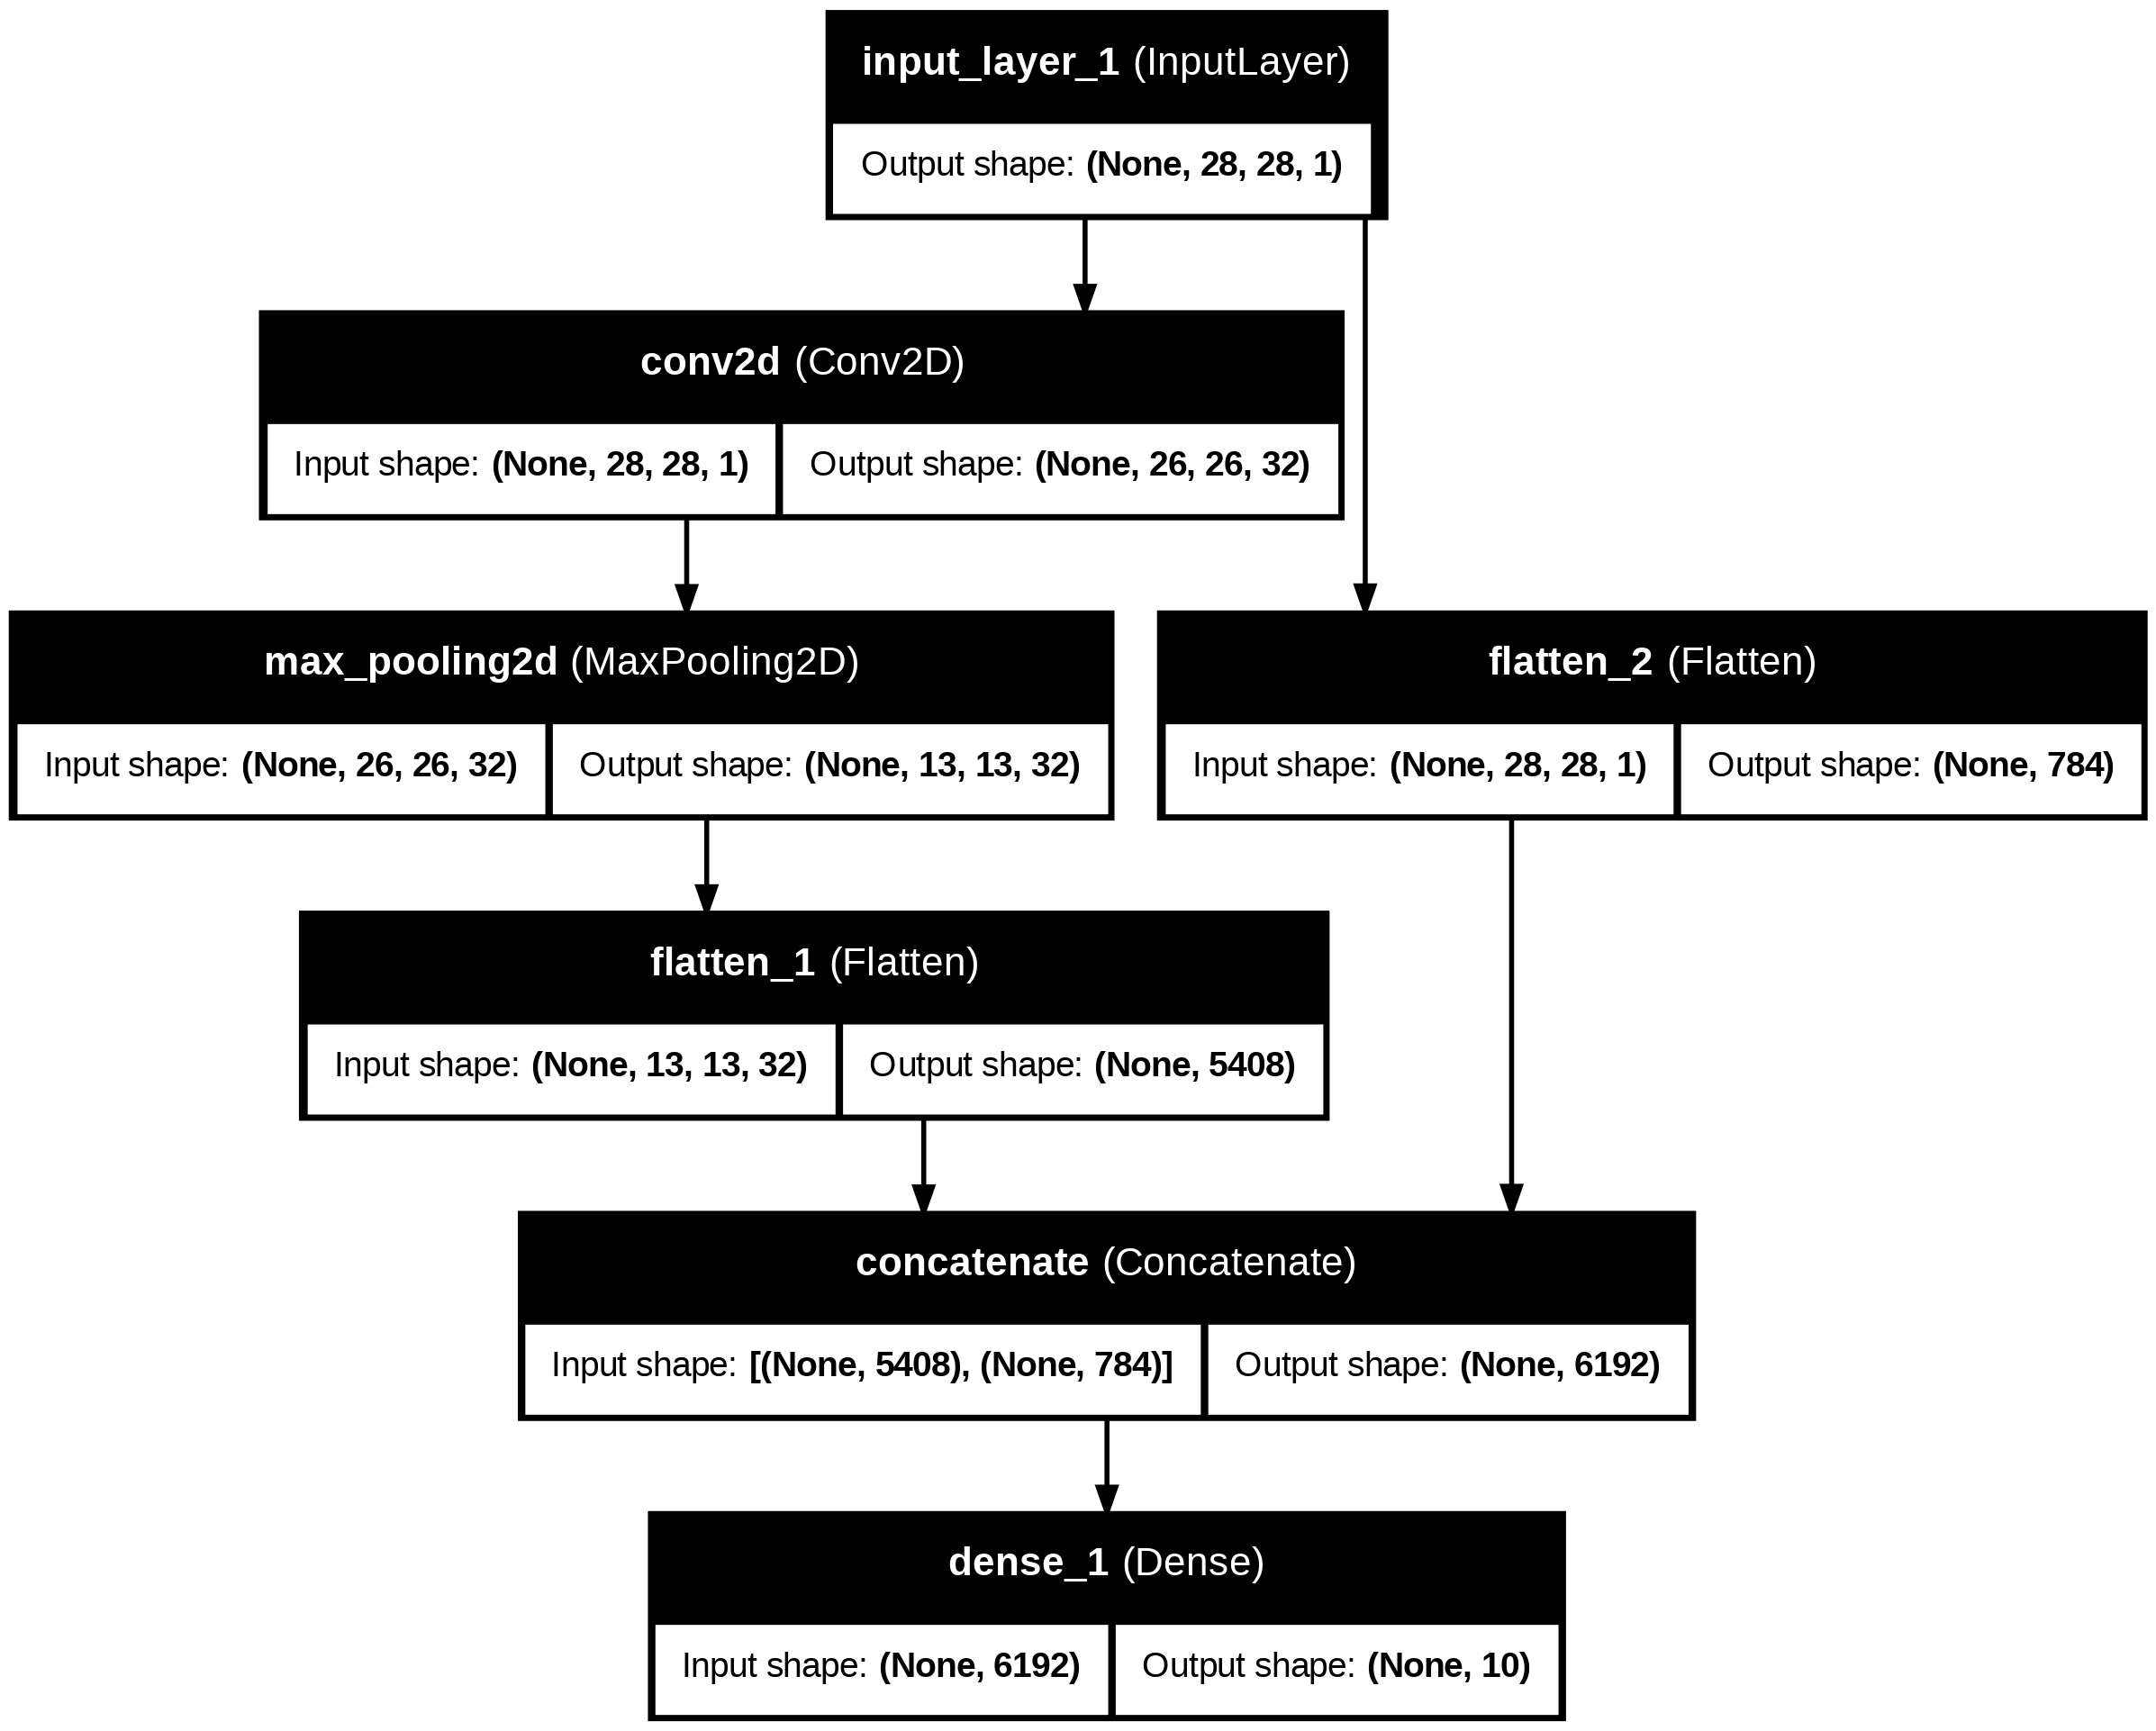

In [28]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'functional_cnn.png')

In [29]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8983 - loss: 0.3607 - val_accuracy: 0.9761 - val_loss: 0.0814
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9768 - loss: 0.0809 - val_accuracy: 0.9758 - val_loss: 0.0703
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9819 - loss: 0.0631 - val_accuracy: 0.9786 - val_loss: 0.0653
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9842 - loss: 0.0516 - val_accuracy: 0.9821 - val_loss: 0.0553
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.9888 - loss: 0.0399 - val_accuracy: 0.9797 - val_loss: 0.0579
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9898 - loss: 0.0336 - val_accuracy: 0.9802 - val_loss: 0.0579
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9817 - val_loss: 0.0565
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9923 -

ValueError: as_list() is not defined on an unknown TensorShape.

###3-3. 다중 출력 분류 모델
두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델

In [30]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1), name = 'inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name = 'maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)       │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_layer (Conv2D)     │ (None, 26, 26, 32)     │            320 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ maxpool_layer             │ (None, 13, 13, 32)     │              0 │ conv2d_layer[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_layer (Flatten)   │ (None, 5408)           │              0 │ maxpool_layer[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 784)            │              0 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 6192)           │              0 │ flatten_layer[0][0],   │
│ (Concatenate)             │                        │                │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ digit_dense (Dense)       │ (None, 10)             │         61,930 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ odd_dense (Dense)         │ (None, 1)              │            785 │ flatten_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 63,035 (246.23 KB)

 Trainable params: 63,035 (246.23 KB)

 Non-trainable params: 0 (0.00 B)

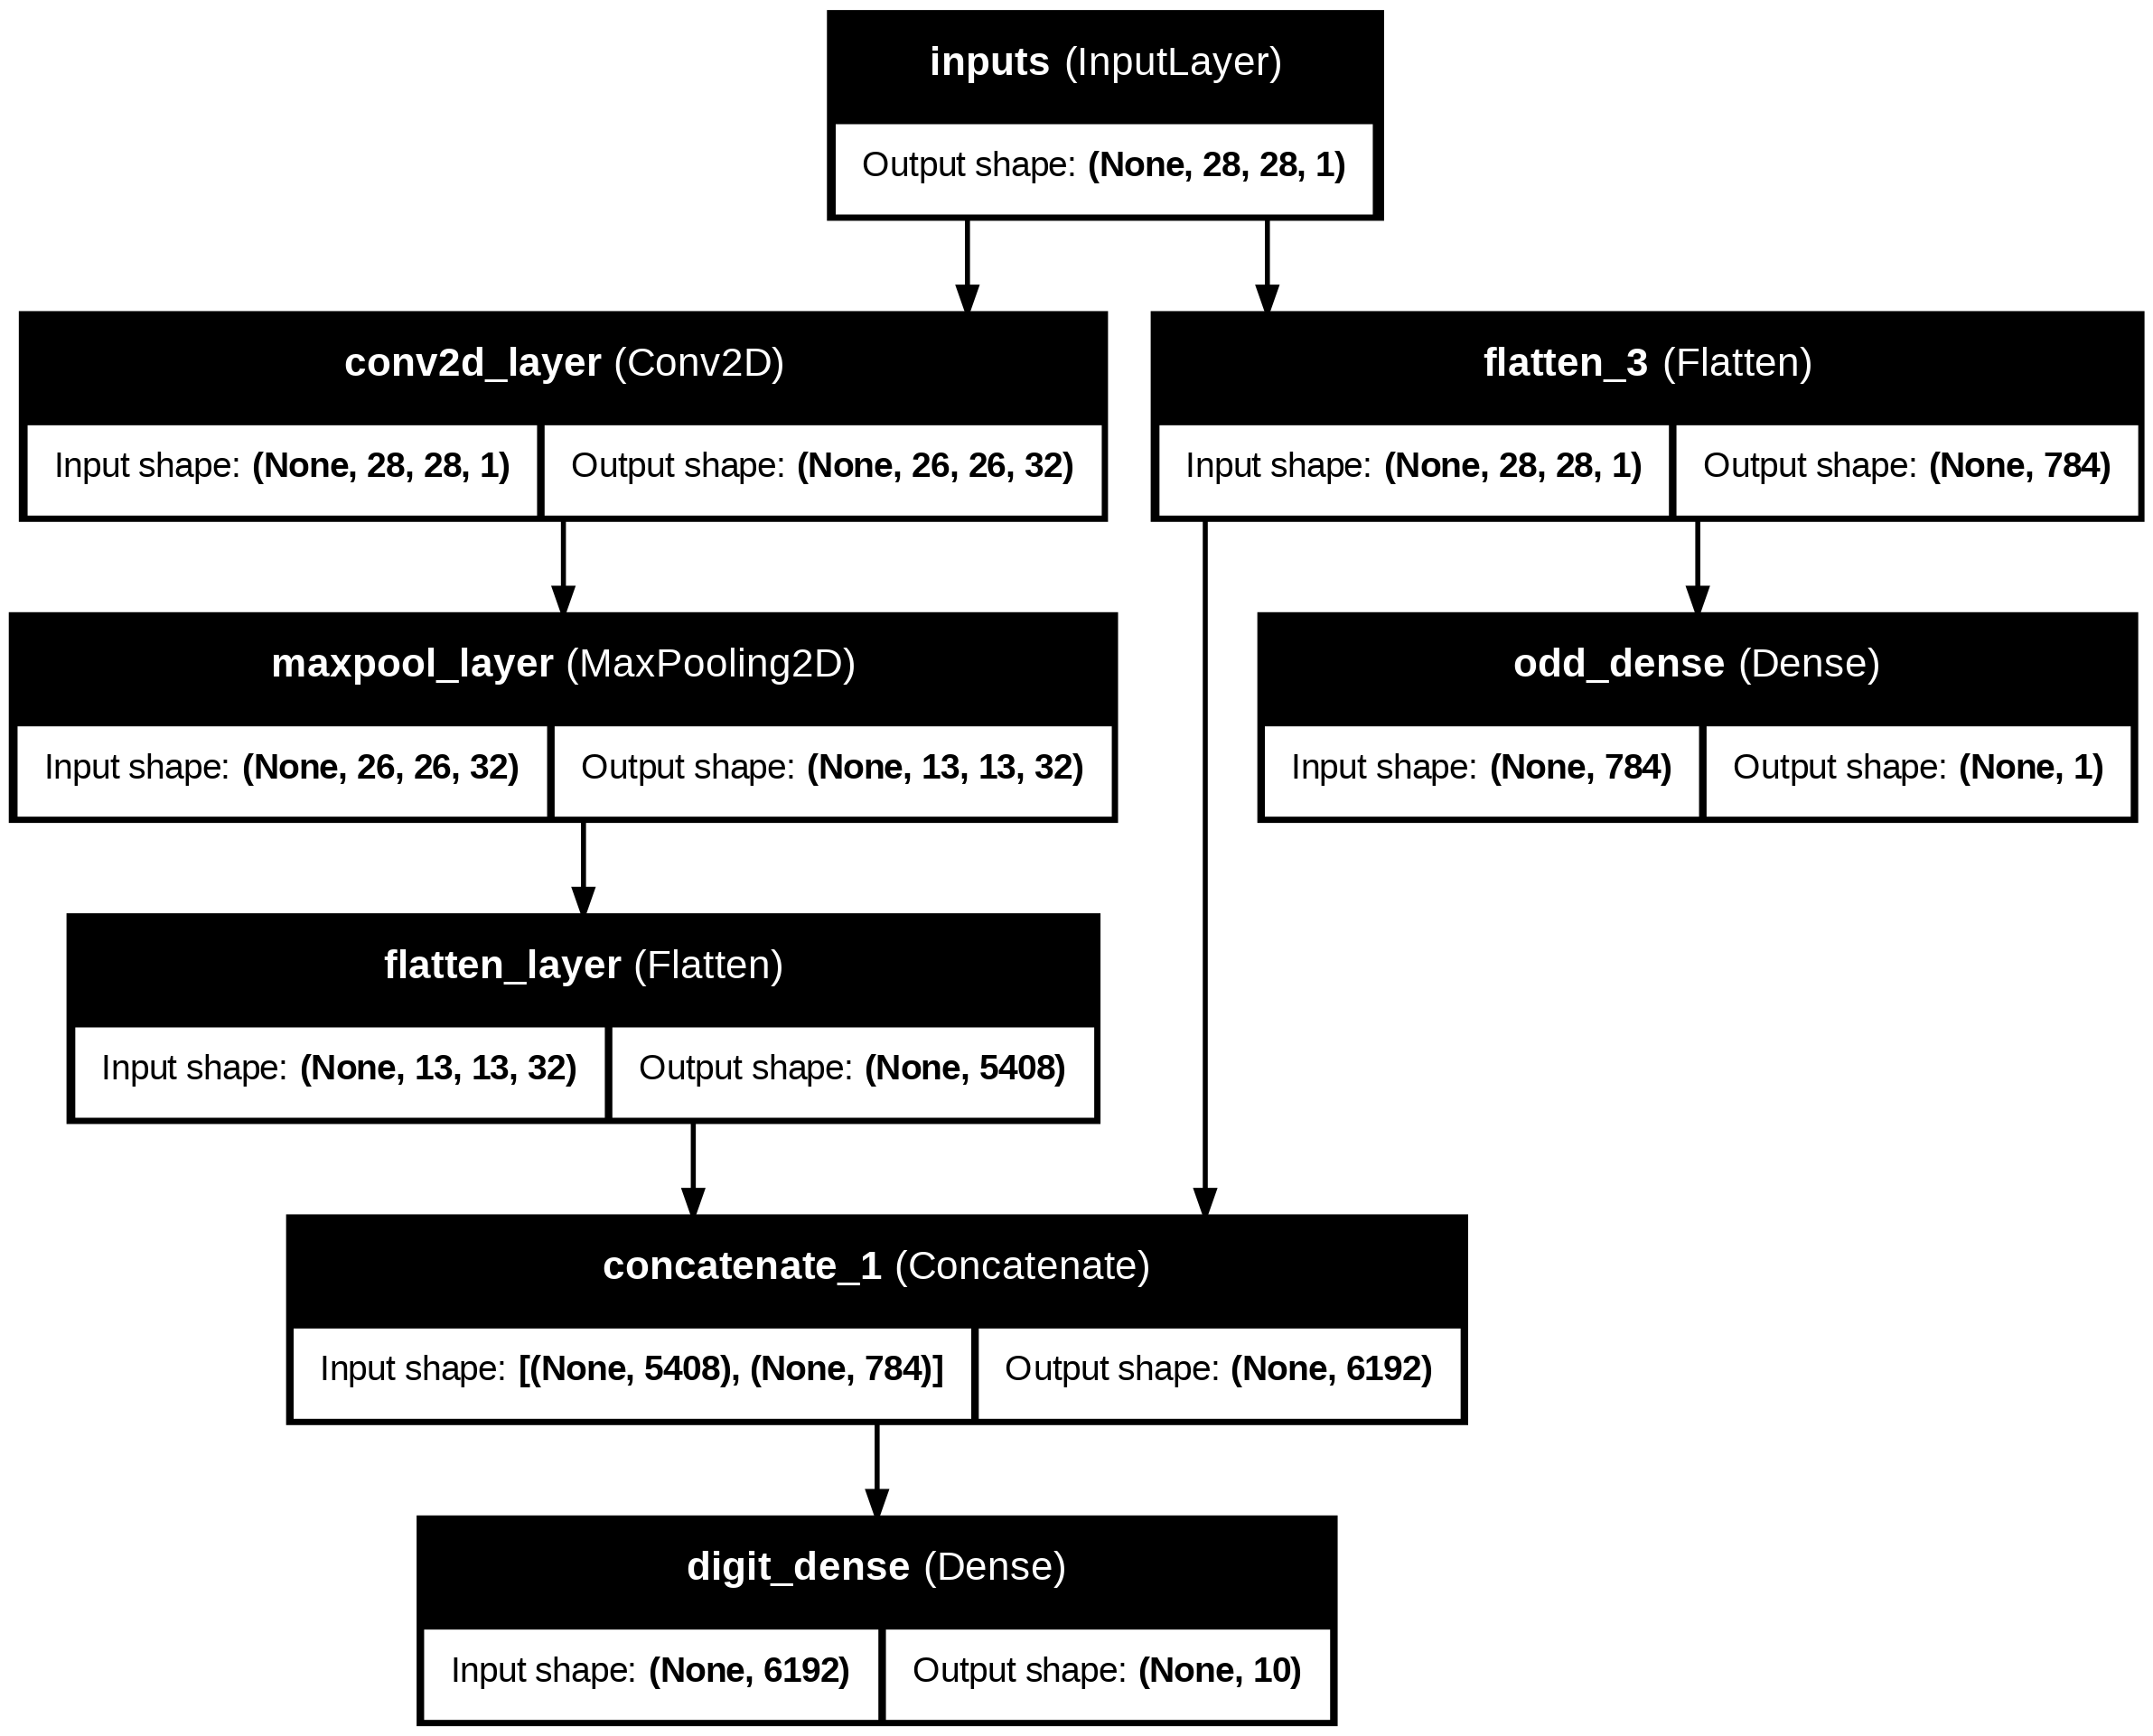

In [31]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')


In [32]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy',
                    'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)


NameError: name 'y_train_odd' is not defined

In [33]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

NameError: name 'y_valid_odd' is not defined

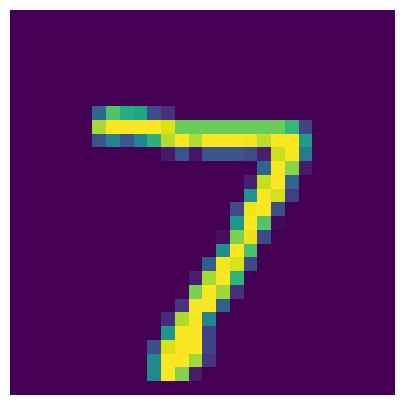

In [34]:
# 샘플 이미지 출력
## 숫자 7에 대한 손글씨 이미지(검증 데이터셋 인덱스 0에 해당하는 이미지)
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [35]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[0.08710306 0.10535873 0.10853796 0.08693127 0.10760376 0.0953084
 0.11625431 0.10529074 0.09634767 0.09126415]
[0.44197595]


In [36]:
digit_labels = np.argmax(digit_preds, axis=1)
digit_labels[0:10]

NameError: name 'np' is not defined

In [37]:
odd_labels = (odd_preds>0.5).astype(np.int64).reshape(1, -1)[0]
odd_labels[0:10]

NameError: name 'np' is not defined

###3-4. 전이 학습
전이학습(Transfer Learning): 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델 재구성하는 것, 기존에 학습된 모델 활용해 새로운 모델 만들어 내는 개념

In [38]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.Model(inputs = model.input, outputs = base_model_output, name = 'base')
base_model.summary()

Model: "base"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_layer (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 5408)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-39-3b78d8342bec>, line 1)

In [40]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ base (Functional)                    │ (None, 5408)                │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

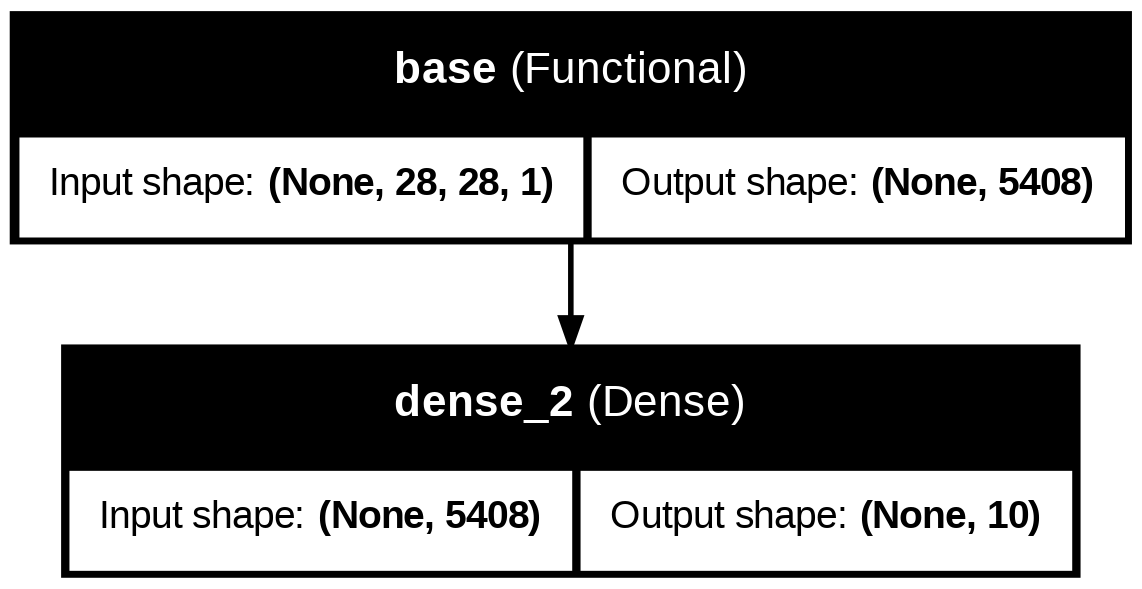

In [41]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')


In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8829 - loss: 0.4114 - val_accuracy: 0.9722 - val_loss: 0.0935
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9757 - loss: 0.0883 - val_accuracy: 0.9775 - val_loss: 0.0671
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9813 - loss: 0.0627 - val_accuracy: 0.9806 - val_loss: 0.0614
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9854 - loss: 0.0498 - val_accuracy: 0.9822 - val_loss: 0.0552
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9872 - loss: 0.0434 - val_accuracy: 0.9835 - val_loss: 0.0543
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9833 - val_loss: 0.0530
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9914 - loss: 0.0293 - val_accuracy: 0.9841 - val_loss: 0.0554
Epoch 8/10
 137/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9929 -

In [ ]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input, outputs = dense_output)
digit_model_frozen.summary()

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)


In [ ]:

base_model_frozen2 = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs = base_model_frozen2.input, outputs = dense_output2)
digit_model_frozen2.summary()

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)
